<a href="https://colab.research.google.com/github/deepakpatle757/Health-Insurance-and-Cross-Sell-Prediction/blob/main/Capstone_Project_Supervised_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - HEALTH INSURANCE CROSS SELL PREDICTION

##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Dipak Patle
##### **Team Member 2 -** Prashik Dhole

# **Project Summary -**

Cross-selling identifies products or services that satisfy additional, complementary needs that are unfulfilled by the original product that a customer possesses. As an example, a mouse could be cross-sold to a customer purchasing a keyboard. Oftentimes, cross-selling points users to products they would have purchased anyways; by showing them at the right time, a store ensures they make the sale.

Cross-selling is prevalent in various domains and industries including banks. For example, credit cards are cross-sold to people registering a savings account. In ecommerce, cross-selling is often utilized on product pages, during the checkout process, and in lifecycle campaigns. It is a highly-effective tactic for generating repeat purchases, demonstrating the breadth of a catalog to customers. Cross-selling can alert users to products they didn't previously know you offered, further earning their confidence as the best retailer to satisfy a particular need.


# **GitHub Link -**

https://github.com/deepakpatle757/Health-Insurance-and-Cross-Sell-Prediction

# **Problem Statement**


Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer. Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from xgboost import XGBClassifier

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
display(df.drop_duplicates())

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### **Variables Description**

**id** : Unique ID for the customer

**Gender** : Gender of the customer

**Age** : Age of the customer

**Driving_License**: 0 = Customer does not have DL, 1 = Customer already has DL

**Region_Code** : Unique code for the region of the customer

**Previously_Insured** : 1 = Customer already has Vehicle Insurance, 0 = Customer doesn't have Vehicle Insurance

**Vehicle_Age** : Age of the Vehicle

**Vehicle_Damage**: 1 = Customer got his/her vehicle damaged in the past. 0 = Customer didn't get his/her vehicle damaged in the past.

**Annual_Premium** : The amount customer needs to pay as premium in the year

**Policy Sales Channel** : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

**Vintage** : Number of Days, Customer has been associated with the company

**Response** : 1 = Customer is interested, 0 = Customer is not interested

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**

#### Chart - 1

<Axes: xlabel='Response', ylabel='count'>

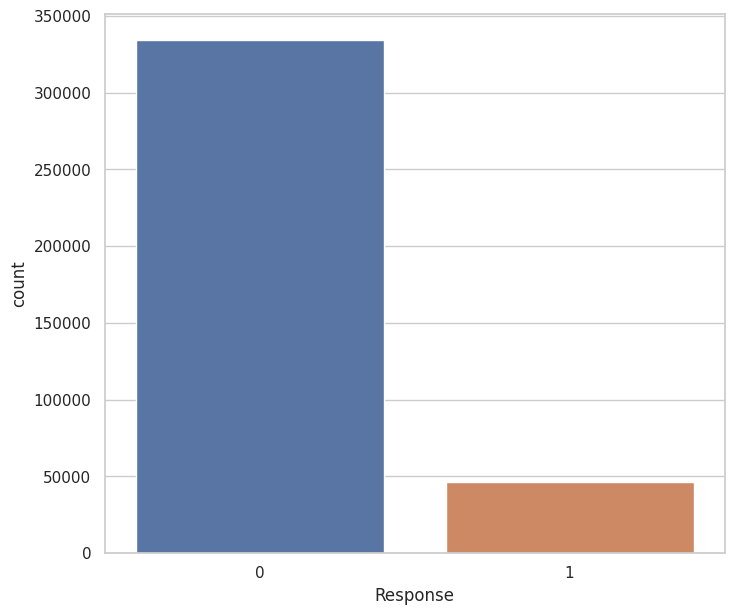

In [ ]:
# Dependent Variable 'Responce'
plt.figure(figsize = (8,7))
sns.set_theme(style = 'whitegrid')
sns.countplot(x = df['Response'], data = df)

* **From above chart we get insight that the data is highly imbalanced**

#### Chart - 2

<Axes: xlabel='Age', ylabel='count'>

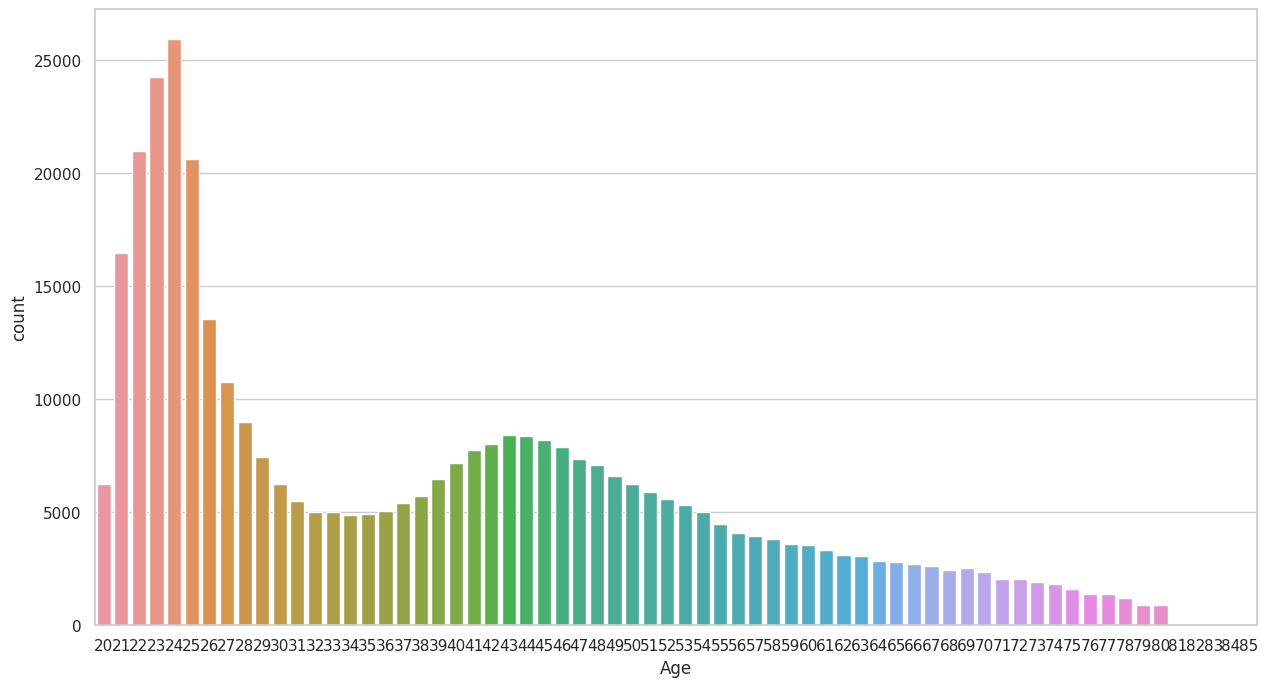

In [ ]:
#Distribution of Age
plt.figure(figsize = (15,8))
sns.countplot(x=df['Age'],data=df)

**From above countplot chart we get insight most of the costumers age is between 21 to 25 years. There are few costumers above the of 60 years.**

#### Chart - 3

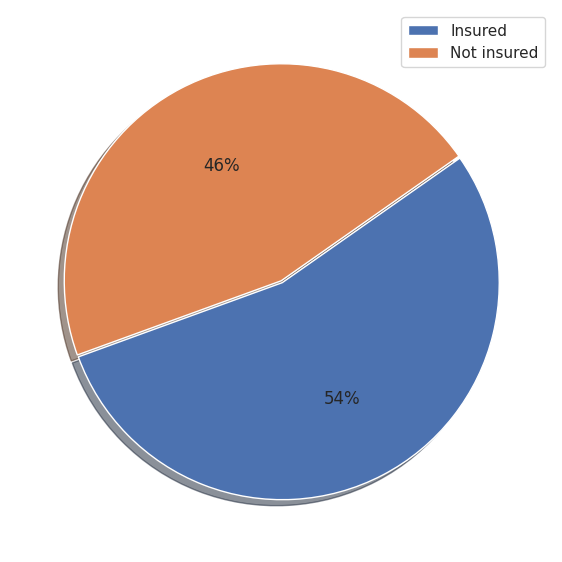

In [ ]:
# Insured and uninsuerd data
plt.figure(figsize=(7,9))
plt.pie(df['Previously_Insured'].value_counts(), autopct='%.0f%%', shadow=True, startangle=200, explode=[0.01,0])
plt.legend(labels=['Insured','Not insured'])
plt.show()

**from above pie chat we get insight that 54% customers are previously insured and 46% customers are not insured yet.and also Customer who are not previously insured are likely to be insured.**

#### Chart - 4

<ipython-input-109-b77f845b6704>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, color='purple')


<Axes: xlabel='Annual_Premium', ylabel='Density'>

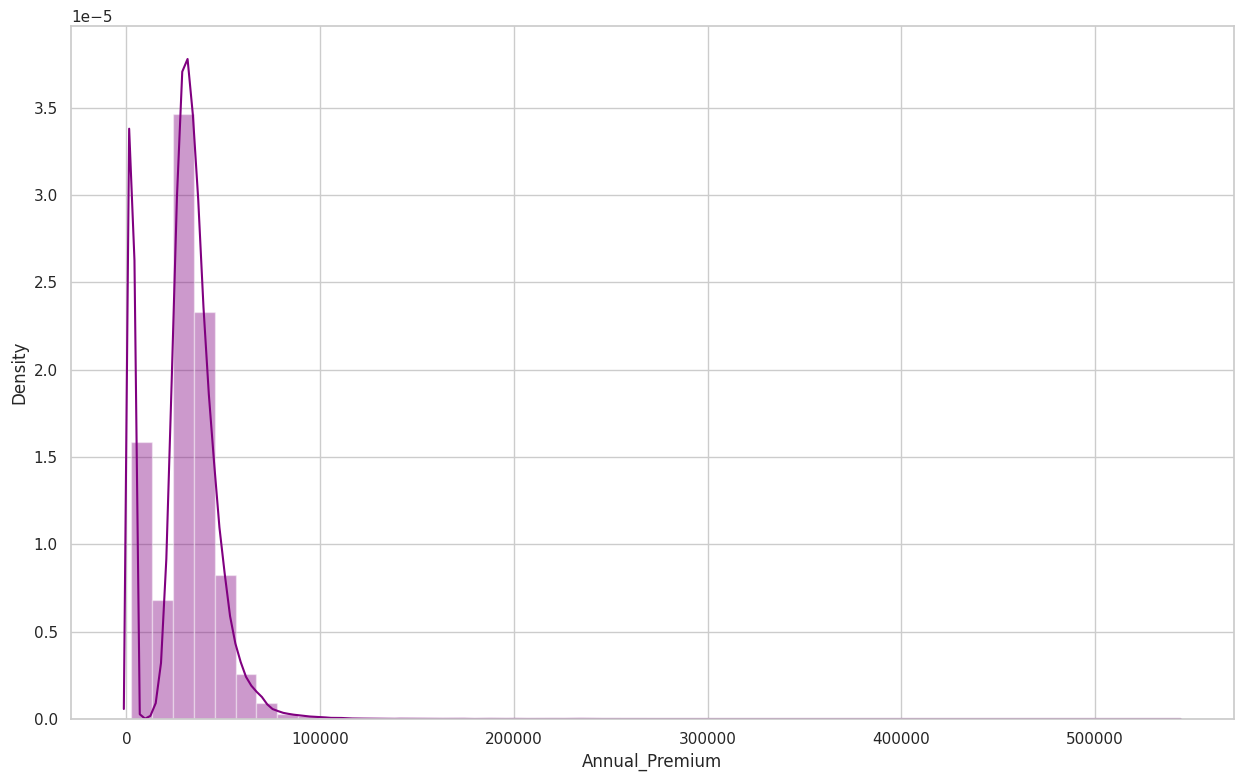

In [ ]:
plt.figure(figsize=(15,9))
a=df['Annual_Premium']
sns.distplot(a, color='purple')

**From the above distribution plot chart  we get insight that the annual premium variable is right asked**

#### Chart - 5

<Axes: >

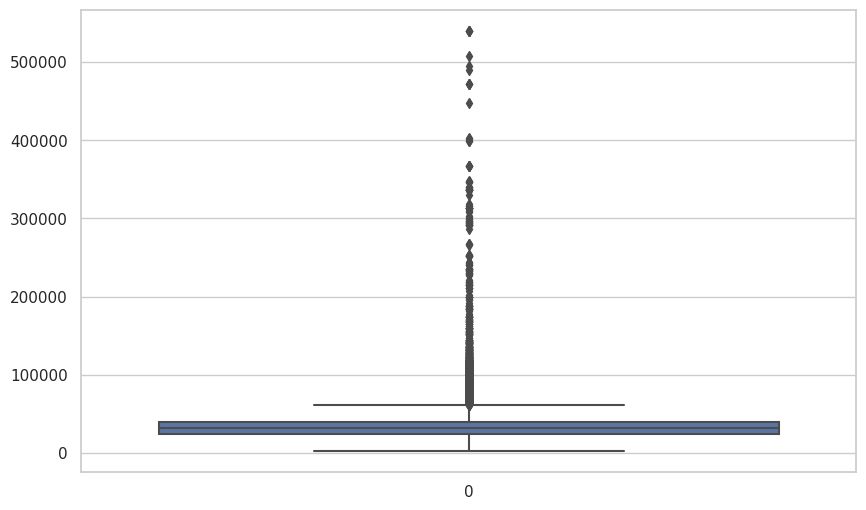

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Annual_Premium'])

**For the above boxplot chart we get insight that there's a lot of outliers in the annual premium.**

#### Chart - 6

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

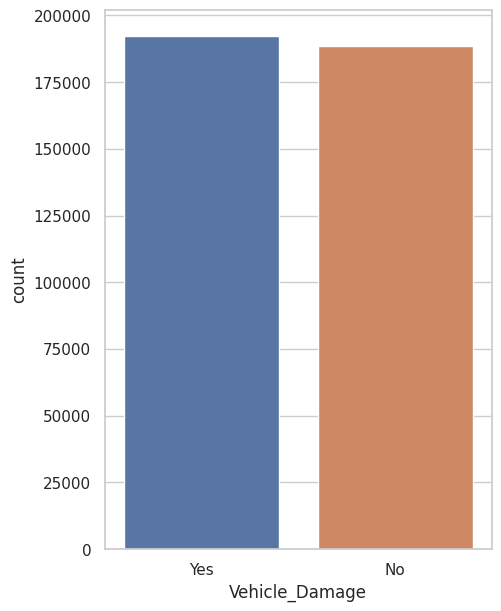

In [ ]:
plt.figure(figsize=(5,7))
sns.countplot(x=df['Vehicle_Damage'])

**from above countplot chart we get insight that the Customers which have Vehicle_Damage are more likely to buy insurance. than the customer who does'nt have vehicle Damage.**

#### Chart - 7

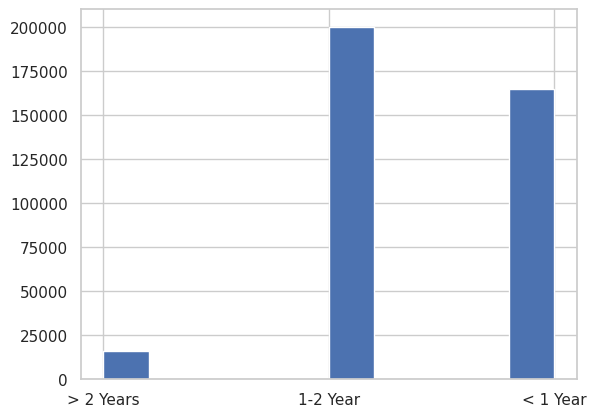

In [ ]:
df['Vehicle_Age'].hist();

**From above histogram chart we get insight that most of people are having vehicle age between 1 or 2 years and very few peoples are having vehicle age more than 2 years.**

### **Bivariate Analysis**

#### Chart - 8

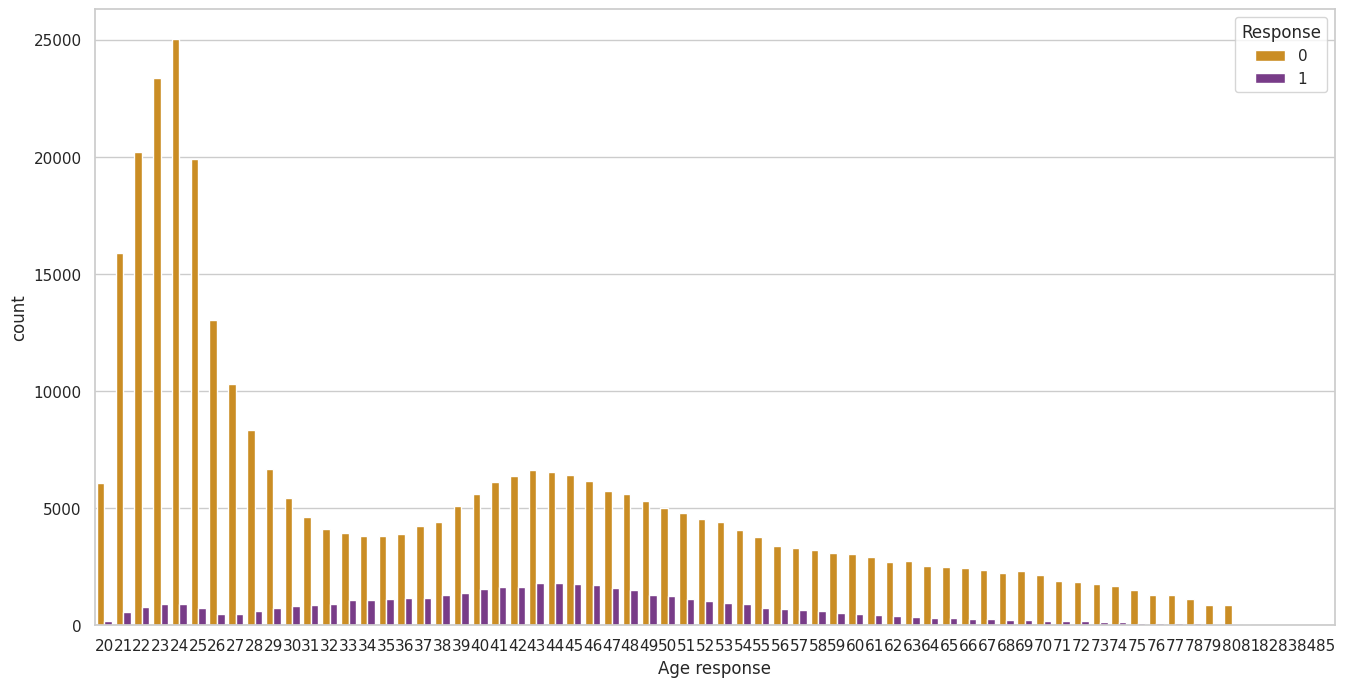

In [ ]:
# Age vs Response
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Age', hue='Response', palette='CMRmap_r')
plt.xlabel('Age response')
plt.ylabel('count')
plt.show()

**from above countplot chart we get insight that People ages between from 31 to 50 are more likely to respond. While Young people below 30 are not interested in vehicle insurance.**

#### Chart - 9

<Axes: xlabel='Gender'>

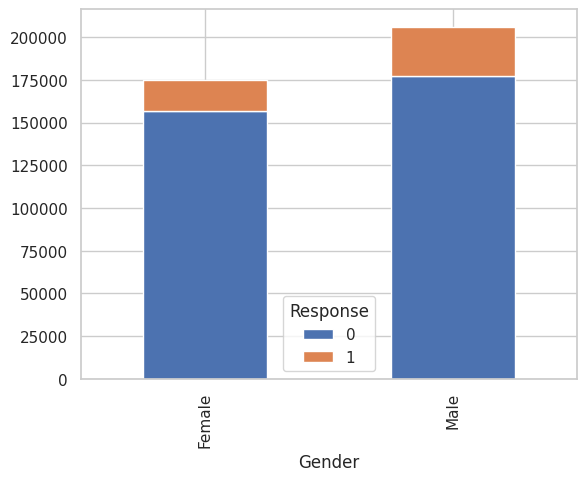

In [ ]:
 # Gender vs Response
 df.groupby(['Gender', 'Response']).size().unstack().plot(kind='bar', stacked=True)

**from above bar plot we get insight that the Male category having a vehicle is slightly greater than that of female category and chances of buying insurance is also little high.**

In [ ]:
#### Chart - 10

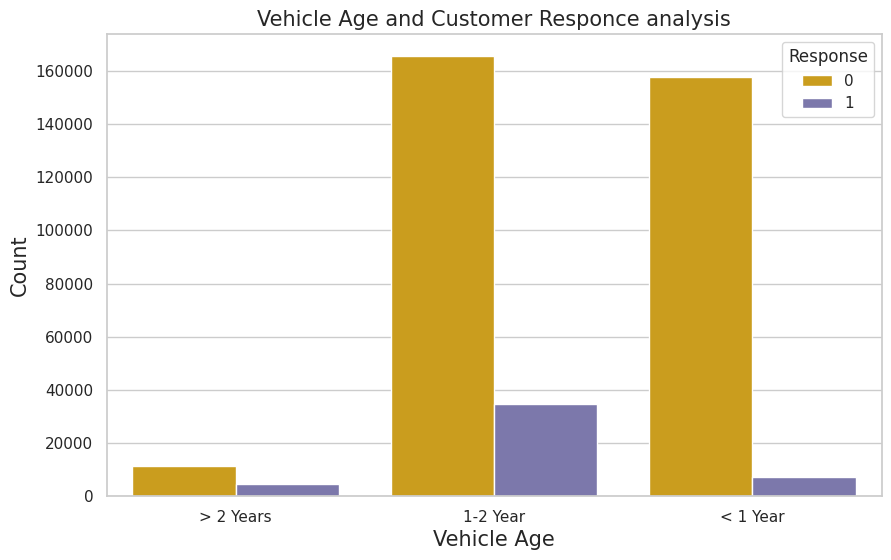

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Vehicle_Age', hue='Response', palette='Dark2_r')
plt.xlabel('Vehicle Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Vehicle Age and Customer Responce analysis', fontsize=15)
plt.show()

**from above countplot we get insight that the Customers with vehicle age 1-2 years are more likely to interested in buying insurance as compared to the other two and Customers with vehicle age <1 years have very less chances of buying insurance**.

#### Chart - 11

<Axes: xlabel='Response', ylabel='Annual_Premium'>

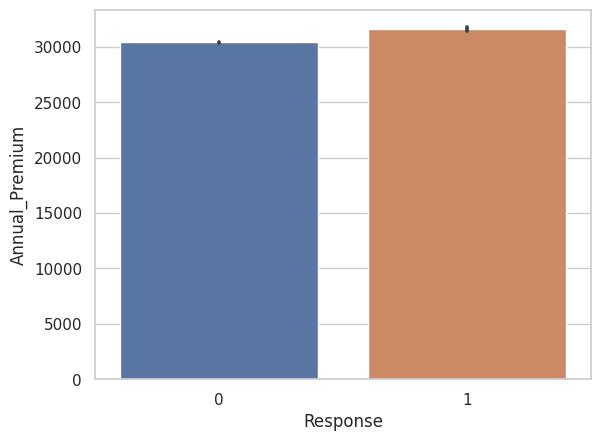

In [ ]:
sns.barplot(x='Response', y='Annual_Premium', data=df)

**from the above bar chart we get insight that the People who response have slightly higher annual premium.**

#### Chart - 12

<ipython-input-118-9e7467aa6363>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

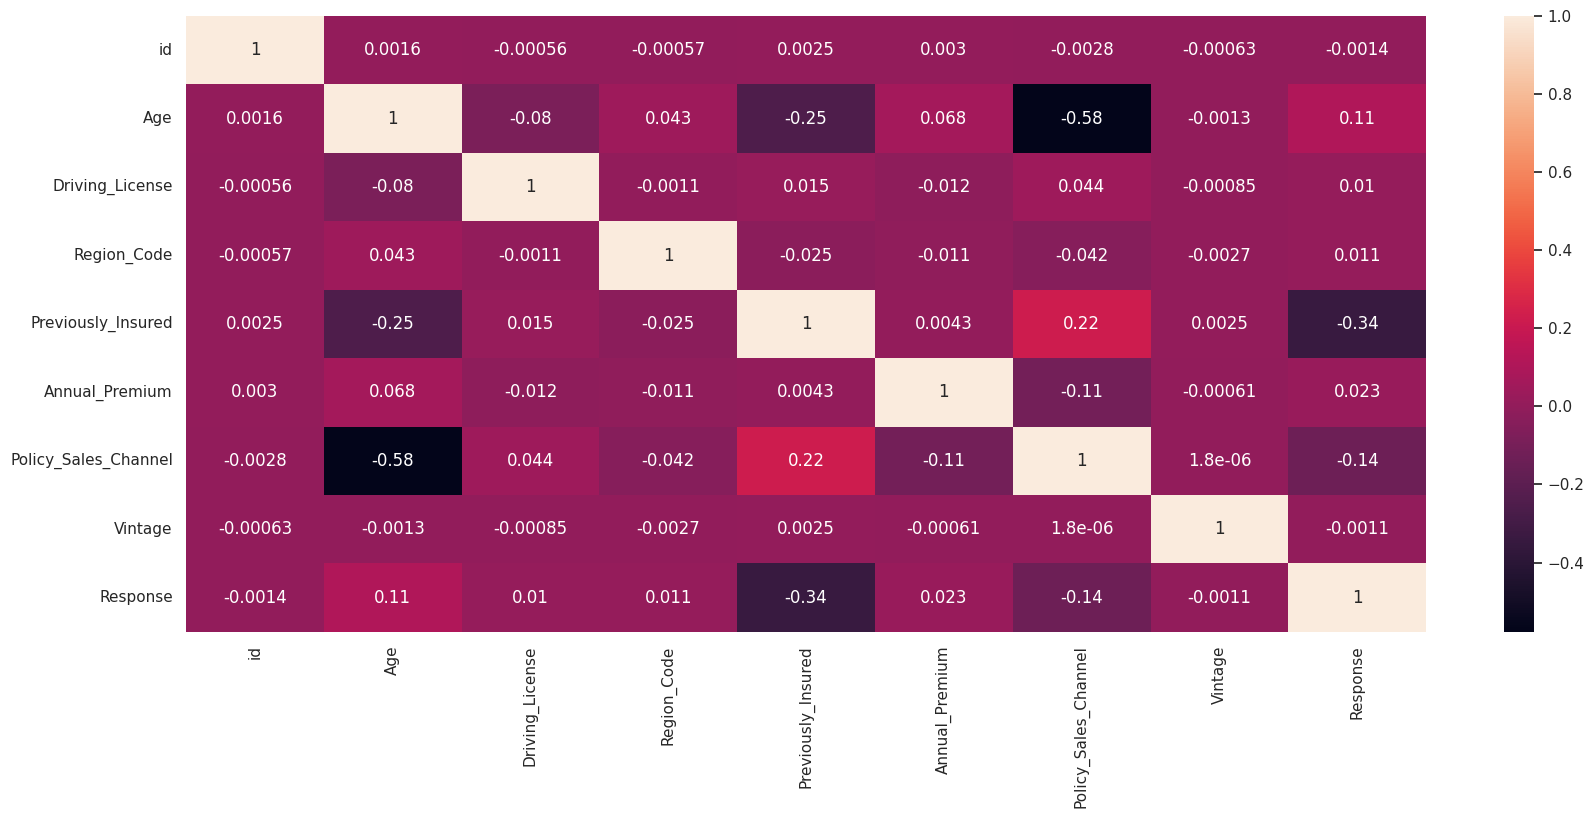

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)

**from above coorelation plot we seen that Target variable is not much affected by Vintage variable. We can drop least correlated variables.**

## **Conclusion of EDA**

1.Most of the costumers who have the vehicle or who owns the vehicle age is ranges between 21 to 25 years. There are few costumers who have vehicle above the of 60 years.

2.54% customers are previously insured and 46% customers are not insured yet.and also Customer who are not previously insured are likely to be insured.

3.The Customers which have Vehicle_Damage are more likely to buy insurance. than the customer who does'nt have vehicle Damage.

4.Most of people are having vehicle age between 1 or 2 years and very few peoples are having vehicle age more than 2 years

5.People ages between from 31 to 50 are more likely to respond. While Young people below 30 are not interested in vehicle insurance.

6.The Male category having a vehicle is slightly greater than that of female category and chances of buying insurance is also little high.

7.The Customers with vehicle age 1-2 years are more likely to interested in buying insurance as compared to the other two and Customers with vehicle age <1 years have very less chances of buying insurance.

8.the People who response have slightly higher annual premium.

### **Encoding Object Columns**

In [ ]:
#Changing categorical values to numerical values
df['Gender']=df['Gender'].map({'Female':1, 'Male': 0})
df['Vehicle_Age']=df['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year': 1, '> 2 Years':2})
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1, 'No': 0})
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


## ***4. Feature Engineering & Data Pre-processing***

In [ ]:
correlation = df.corr()
correlation['Response'].sort_values(ascending=False)[1:]

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

In [ ]:
X=df.drop(columns=['id', 'Driving_License', 'Policy_Sales_Channel','Vintage', 'Response'])
y=df['Response']

In [ ]:
# Fill any NaNs with mode()
fill_mode=lambda col: col.fillna(col.mode())
X= X.apply(fill_mode, axis =0)
df=df.apply(fill_mode, axis=0)

## ***5. Model Building***

In [ ]:
# Check for imbalance in data
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

* We can clearly see that there is a huge difference between the dataset.
* Satndard ML techniques such as Desicion Tree and Logistic Regression have a bias towards the majority class and they tend to ignore the minority class. So solving this issue we can resampling techniques.

In [ ]:
# Resampling
ros = RandomOverSampler(random_state=0)
X_new,y_new = ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Sample are :", len(y_new))
print("Original dataset shape{}".format(Counter(y)))
print("Resampled dataset shape{}".format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Sample are : 668798
Original dataset shapeCounter({0: 334399, 1: 46710})
Resampled dataset shapeCounter({1: 334399, 0: 334399})


### ***Splitting the Data in Train in Test sets***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((468158, 7), (200640, 7), (468158,), (200640,))

In [ ]:
# Normalizing the Dataset using Standard Scalling Technique
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ***Logistic Regression***

In [ ]:
model = LogisticRegression(random_state=42)
model = model.fit(X_train, y_train)
# Making Prediction
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]

#### Model Evaluation

In [ ]:
# Evaluation
r_lgt = recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt = precision_score(y_test, pred)
print("precision_score : ", p_lgt)

f1_lgt = f1_score(y_test, pred)
print("f1_score : ", f1_lgt)

A_lgt = accuracy_score(y_test, pred)
print("accuracy_score : ", A_lgt)

acu_lgt = roc_auc_score(y_test, pred)
print("ROC_AUC_score : ", acu_lgt)

recall_score :  0.976100453713285
precision_score :  0.7071892503658422
f1_score :  0.8201651165221027
accuracy_score :  0.7855811403508772
ROC_AUC_score :  0.7852310609223132


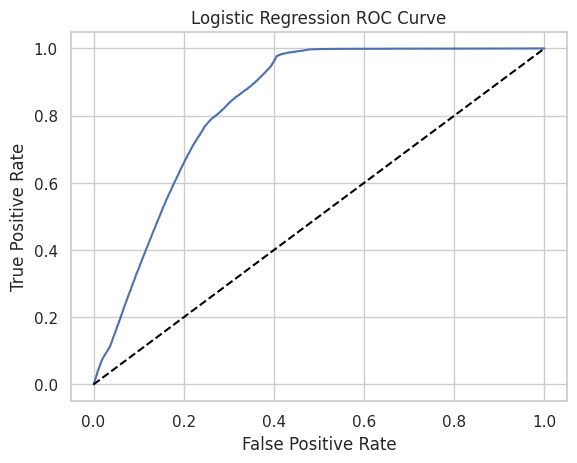

In [ ]:
fpr, tpr, _= roc_curve(y_test, prob)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle='--', color='black')
plt.show()

#### Confusion Matrix

[[59517 40619]
 [ 2402 98102]]


<Axes: >

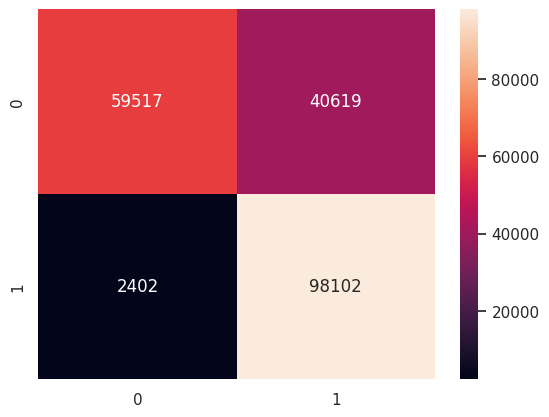

In [ ]:
matrix=confusion_matrix(y_test, pred)
print(matrix)
sns.heatmap(matrix, annot=True, fmt='g')

* From confusion matrix we see that the model is predicting positive response but also predicting negative response too.

In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61919
           1       0.98      0.71      0.82    138721

    accuracy                           0.79    200640
   macro avg       0.79      0.83      0.78    200640
weighted avg       0.86      0.79      0.79    200640



### ***RandomForest Classifier***

In [ ]:
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:,1]

#### Model Evaluation

In [ ]:
# Evaluation
r_rf = recall_score(y_test, rf_pred)
print("recall_score : ", r_lgt)

p_rf = precision_score(y_test, rf_pred)
print("precision_score : ", p_lgt)

f1_rf = f1_score(y_test, rf_pred)
print("f1_score : ", f1_lgt)

A_rf = accuracy_score(y_test, rf_pred)
print("accuracy_score : ", A_lgt)

acu_rf = roc_auc_score(y_test, rf_pred)
print("ROC_AUC_score : ", acu_lgt)

recall_score :  0.976100453713285
precision_score :  0.7071892503658422
f1_score :  0.8201651165221027
accuracy_score :  0.7855811403508772
ROC_AUC_score :  0.7852310609223132


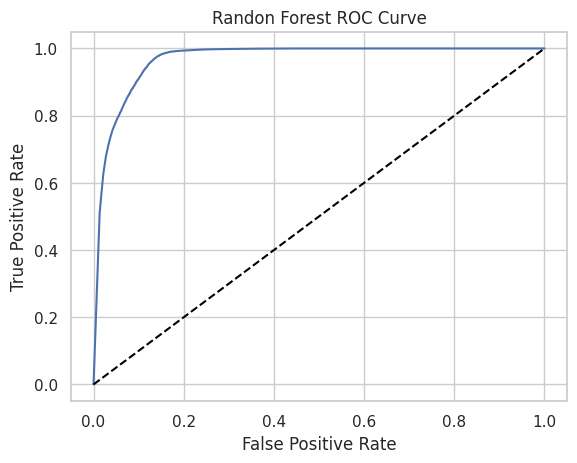

In [ ]:
fpr, tpr, _= roc_curve(y_test, rf_proba)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Randon Forest ROC Curve')
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle='--', color='black')
plt.show()

#### Confusion Matrix

[[84468 15668]
 [ 1462 99042]]


<Axes: >

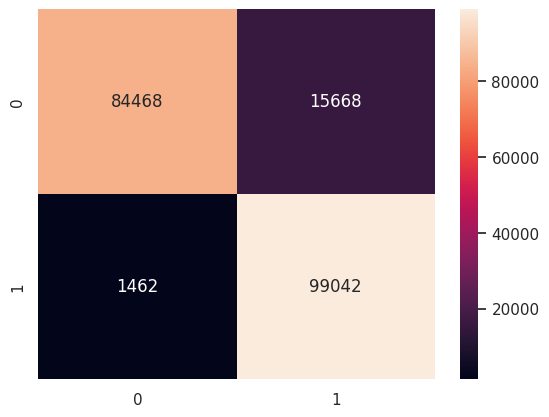

In [ ]:
matrix=confusion_matrix(y_test, rf_pred)
print(matrix)
sns.heatmap(matrix, annot=True, fmt='g')

* The confusion matrix now shows that the model now is much better with predicting positive response.

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91    100136
           1       0.86      0.99      0.92    100504

    accuracy                           0.91    200640
   macro avg       0.92      0.91      0.91    200640
weighted avg       0.92      0.91      0.91    200640



* The model performs very well, so we  can use it to predict unkniwn data.

### ***XGBoost***

In [ ]:
XG_model = XGBClassifier()
XG_model = XG_model.fit(X_train, y_train)

XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]

#### Mode Evaluation

In [ ]:
# Evaluation
r_XG = recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG = precision_score(y_test, XG_pred)
print("precision_score : ", p_XG)

f1_XG = f1_score(y_test, XG_pred)
print("f1_score : ", f1_XG)

A_XG = accuracy_score(y_test, XG_pred)
print("accuracy_score : ", A_XG)

acu_XG = roc_auc_score(y_test, XG_pred)
print("ROC_AUC_score : ", acu_XG)

recall_score :  0.9365398392103796
precision_score :  0.7444262541422482
f1_score :  0.8295049461323228
accuracy_score :  0.8071521132376396
ROC_AUC_score :  0.8069143631619526


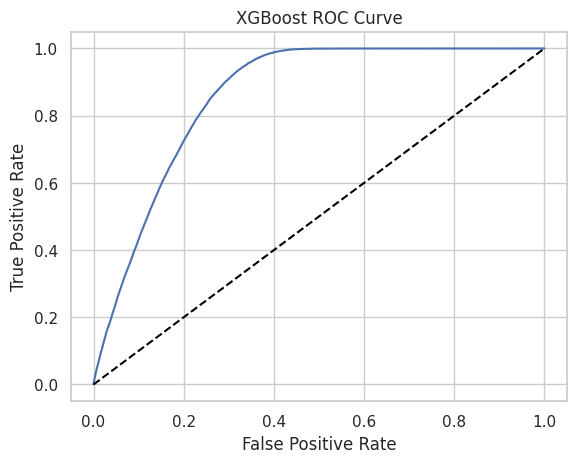

In [ ]:
fpr, tpr, _= roc_curve(y_test, XG_prob)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('XGBoost ROC Curve')
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle='--', color='black')
plt.show()

#### Confusion Matrix

[[67821 32315]
 [ 6378 94126]]


<Axes: >

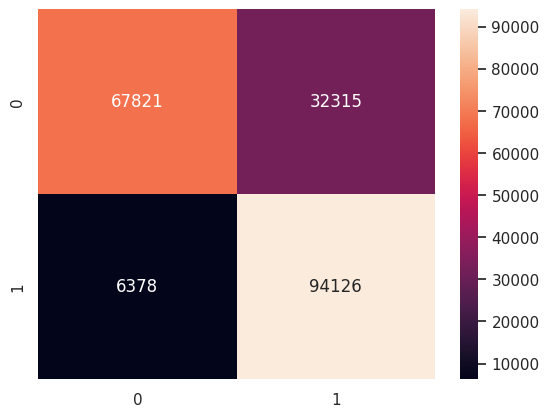

In [ ]:
matrix=confusion_matrix(y_test, XG_pred)
print(matrix)
sns.heatmap(matrix, annot=True, fmt='g')

* From the confusion matrix we see that the model is bit better with predicting positive response.

In [ ]:
print(classification_report(XG_pred, y_test))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78     74199
           1       0.94      0.74      0.83    126441

    accuracy                           0.81    200640
   macro avg       0.81      0.83      0.80    200640
weighted avg       0.84      0.81      0.81    200640



### ***Comparing the Model***

In [ ]:
com = ['Logistic Regression', 'Randomforest', 'XGBClassifier']
data = {'Accuracy':[A_lgt,A_rf,A_XG],'Recall':[r_lgt,r_rf,r_XG],'Precision':[p_lgt,p_rf,p_XG],'f1_score':[f1_lgt,f1_rf,f1_XG],'ROC_AUC':[acu_lgt,acu_rf,acu_XG]}
result = pd.DataFrame(data=data, index=com)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic Regression,0.785581,0.976100,0.707189,0.820165,0.785231
Randomforest,0.914623,0.985453,0.863412,0.920405,0.914493
XGBClassifier,0.807152,0.936540,0.744426,0.829505,0.806914


# ***Conclusion***

* Customers of age between 30 to 60 are more likely to buy insurance.
* Customers with Driving License have higher chance of buying insuransce.
* Customer with vehicle damage are likely to buy insurance.
* The variables suc as Age, Previous_Insured, Annual_Premium are more affecting the target varialbles.
* Comparing ROC curve we can see that Random Forest model perform better. Because curves closer to the top-left corner, it indicates a better perormance.